<a href="https://colab.research.google.com/github/waqarmm/AI-Labs/blob/master/knn_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
movies=pd.read_csv('Movies_dataset.csv')
ratings=pd.read_csv('Ratings_dataset.csv')
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [6]:
movies.shape


(10329, 3)

In [7]:
ratings.shape

(105339, 4)

In [10]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [9]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [15]:
genres=[]
for genre in movies.genres:
   x=genre.split('|')
   for i in x:
    if i not in genres:
        genres.append(str(i))
    genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
    movie_title=str(movie_title)

AttributeError: ignored

In [19]:
genres = []
for genre in movies.genres:
   x = genre.split('|')
   for i in x:
    if i not in genres:
        genres.append(i)
print(genres)
movie_title = []
for title in movies.title:
    movie_title.append(title[0:-7])
print(movie_title)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']
['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Wings of Courage', 'Babe', 'Carrington', 'Dead Man Walking', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Res

In [20]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])
movies['genres']

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
10324                      Animation|Children|Comedy
10325                                         Comedy
10326                                         Comedy
10327                                          Drama
10328                             (no genres listed)
Name: genres, Length: 10329, dtype: object

In [24]:
from sklearn.neighbors import NearestNeighbors
# Create a NearestNeighbors model with cosine similarity
knn = NearestNeighbors(metric='cosine')
knn.fit(tfidf_matrix)
NearestNeighbors(metric='cosine')
def movie_recommendations(movie_title, num_recommendations=5):
# Find the index of the given movie title
   movie_index = movies[movies['title'] == movie_title].index[0]
# Find the nearest neighbors of the chosen movie
   distances, indices = knn.kneighbors(tfidf_matrix[movie_index])
    # Print the recommended movies
   print("Recommendations for", movie_title, ":")
   for index in indices.flatten()[1:num_recommendations+1]:
        print(movies.iloc[index]['title'])
movie_recommendations('Toy Story (1995)', num_recommendations=8)

Recommendations for Toy Story (1995) :
DuckTales: The Movie - Treasure of the Lost Lamp (1990)
Adventures of Rocky and Bullwinkle, The (2000)
Monsters, Inc. (2001)
Antz (1998)


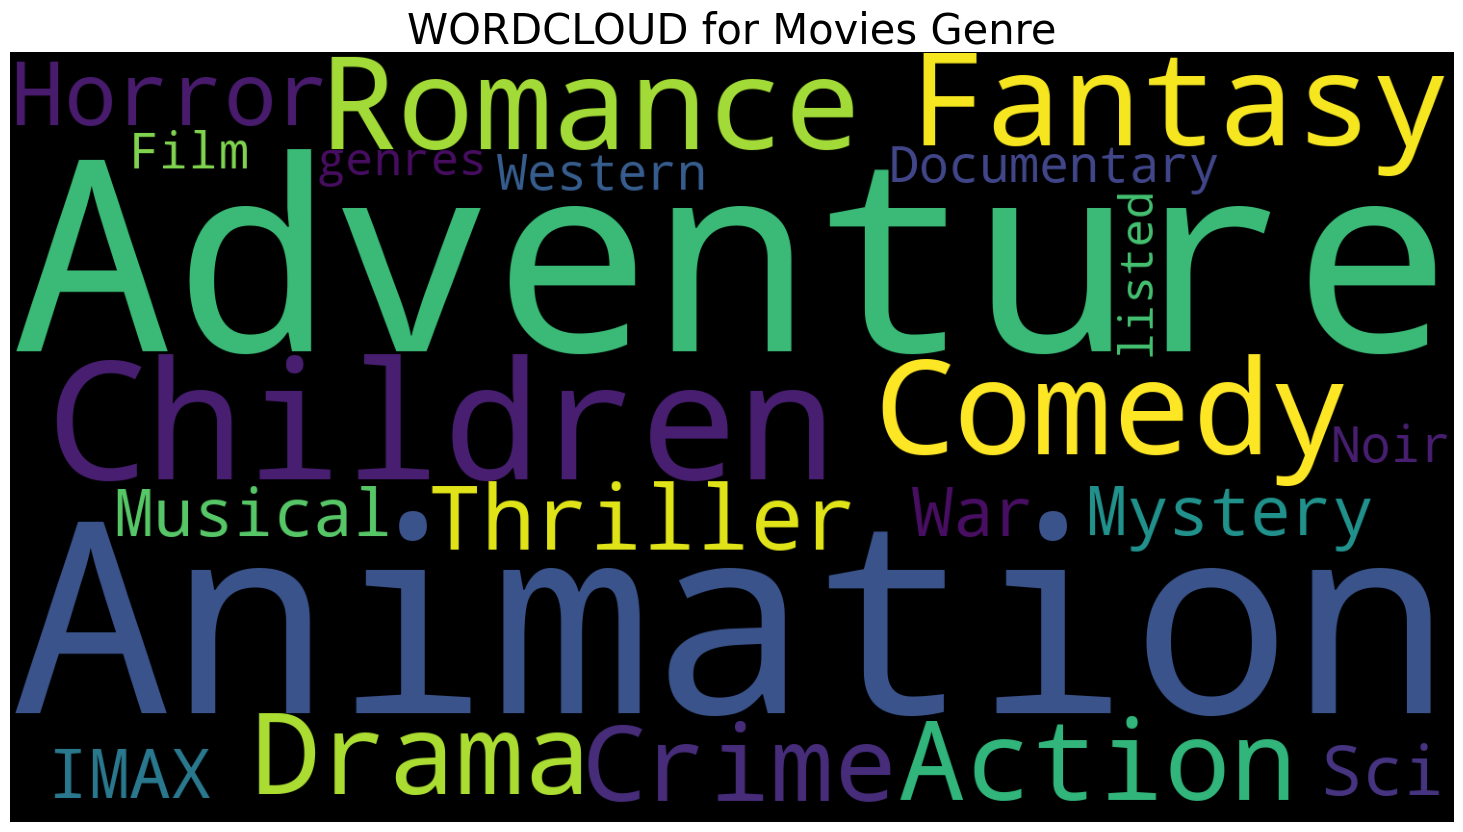

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genres = []
for genre in movies.genres:
   x = genre.split('|')
   for i in x:
    if i not in genres:
        genres.append(i)

# print(genres)

movie_title = []
for title in movies.title:
    movie_title.append(title[0:-7])

# print(movie_title)

wordcloud_genre = WordCloud(width=1500, height=800, background_color='black', min_font_size=2, min_word_length=3).generate(' '.join(genres))
wordcloud_title = WordCloud(width=1500, height=800, background_color='cyan', min_font_size=2, min_word_length=3).generate(' '.join(movie_title))

plt.figure(figsize=(30, 10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre', fontsize=30)
plt.imshow(wordcloud_genre)
plt.show()
